## Define business goal 
We are trying to predict number of visitors for next year. We have data from the mall with unknown features and weather forecast
Data presented for each day, we will use regression model to predict the results

Import libraries

In [523]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [524]:
def print_scores(y, y_pred):
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y,y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)
    print('RMSE: ',rmse)
    print('R2: ',r2)
    print('MAPE: ',mape)

Plotting functions

In [525]:
plt.rcParams['figure.figsize'] = (14,6)
def plot(df, title):
    df.plot()
    plt.title(title)
    plt.ylabel('label')
    plt.show()

Load data

In [572]:
df=pd.read_csv('data/data_train.csv', index_col=0, parse_dates=True)

In [540]:
df.head(10)

,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,school_holiday,feature_8,feature_9,feature_10,label
date,,,,,,,,,,,,,,
2005-03-20,0,0,0,0,3.2,6.7,1.7,3.7,0,0,0,0,0,915
2005-03-21,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1057
2005-03-22,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1482
2005-03-23,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1883
2005-03-24,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1790
2005-03-25,3,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,2193
2005-03-26,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1481
2005-03-27,0,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,865
2005-03-28,3,0,0,0,3.2,6.7,1.7,3.7,0,3,0,0,0,1942


In [541]:
df.shape

(1743, 14)

In [573]:
df.index = pd.to_datetime(df.index)

Build baseline model 

In [543]:
X=df.drop('label', axis=1)
y=df['label']

Split to train and test data

In [544]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

Build simple model as a baseline model 

In [545]:
sm=LinearRegression()
sm.fit(X_train, y_train)
y_pred = sm.predict(X_test)

Scores to estimate regression model: mean_squared_error, r2_score

In [546]:
print_scores(y_test, y_pred)

RMSE:  521.5521750378103
R2:  0.30639426637476685
MAPE:  0.44609407020354885


In [574]:
df_w=pd.read_csv('data/weather.csv', index_col=0, parse_dates=True)

In [548]:
df_w.head()

,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
date,,,,,,,,
2005-03-20,69.0,8.9,4.4,0.2,0.0,0,11.1,7.6
2005-03-21,58.0,13.2,6.2,-0.3,0.0,0,11.3,9.7
2005-03-22,52.0,18.0,10.6,3.0,3.3,0,8.6,9.2
2005-03-23,79.0,17.6,12.5,7.2,0.0,0,8.4,8.2
2005-03-24,71.0,20.1,13.3,6.4,4.3,0,7.9,8.6


In [575]:
df_w.index = pd.to_datetime(df_w.index)

In [550]:
df_w.shape

(2106, 8)

In [576]:
df=df.join(df_w)

In [552]:
df.shape

(1743, 22)

## EDA

In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1743 entries, 2005-03-20 to 2009-12-31
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bank_holiday               1743 non-null   int64  
 1   feature_0                  1743 non-null   int64  
 2   feature_1                  1743 non-null   int64  
 3   feature_2                  1743 non-null   int64  
 4   feature_6                  1743 non-null   float64
 5   feature_7                  1743 non-null   int64  
 6   school_holiday             1743 non-null   int64  
 7   feature_10                 1743 non-null   int64  
 8   label                      1743 non-null   int64  
 9   air_humidity               1743 non-null   float64
 10  air_temperature_daily_max  1743 non-null   float64
 11  precipitation              1743 non-null   float64
 12  snow_height                1743 non-null   float64
 13  sunshine_hours             174

In [191]:
df.describe()

,bank_holiday,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,school_holiday,...,feature_10,label,air_humidity,air_temperature_daily_max,air_temperature_daily_mean,air_temperature_daily_min,precipitation,snow_height,sunshine_hours,wind_speed_max
count,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,1743.000000,...,1743.000000,1743.000000,1736.000000,1731.000000,1740.000000,1730.000000,1743.000000,1743.000000,1732.000000,1730.000000
mean,0.076879,0.065978,0.052783,0.040734,3.856053,7.076936,2.076936,4.076936,0.043029,0.732071,...,0.058520,1119.440046,79.497120,14.913345,10.725632,6.624682,2.371084,0.201377,4.496016,10.358844
std,0.461925,0.248315,0.223663,0.197731,0.591818,0.349210,0.349210,0.349210,0.202981,1.127334,...,0.234791,616.640338,11.881062,8.033921,6.638530,5.749324,4.703370,1.472737,4.324390,3.718319
min,0.000000,0.000000,0.000000,0.000000,3.200000,6.700000,1.700000,3.700000,0.000000,0.000000,...,0.000000,142.000000,38.000000,-9.900000,-12.100000,-14.700000,0.000000,0.000000,0.000000,2.700000
25%,0.000000,0.000000,0.000000,0.000000,3.200000,6.700000,1.700000,3.700000,0.000000,0.000000,...,0.000000,623.000000,72.000000,8.700000,5.975000,2.800000,0.000000,0.000000,0.500000,7.725000
50%,0.000000,0.000000,0.000000,0.000000,4.300000,7.300000,2.300000,4.300000,0.000000,0.000000,...,0.000000,930.000000,81.500000,15.400000,11.100000,6.900000,0.200000,0.000000,3.500000,9.900000
75%,0.000000,0.000000,0.000000,0.000000,4.300000,7.300000,2.300000,4.300000,0.000000,1.000000,...,0.000000,1532.000000,89.000000,21.000000,15.800000,11.100000,2.850000,0.000000,7.300000,12.500000
max,3.000000,1.000000,1.000000,1.000000,4.600000,7.600000,2.600000,4.600000,1.000000,3.000000,...,1.000000,3761.000000,100.000000,36.300000,27.400000,19.400000,44.600000,28.000000,16.100000,35.200000


## Check features, correlation

<AxesSubplot:>

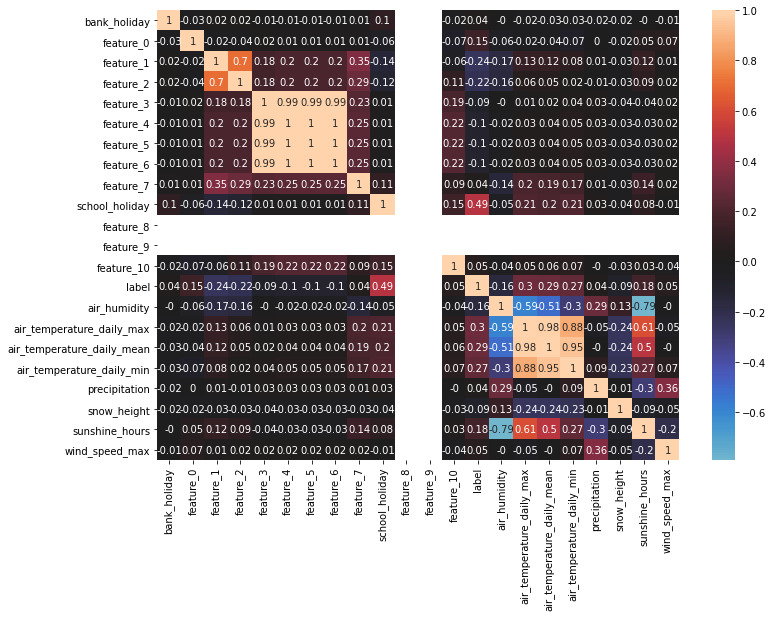

In [96]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(df.corr().round(2), annot=True, center = 0)

In [97]:
df.columns

Index(['bank_holiday', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'school_holiday',
       'feature_8', 'feature_9', 'feature_10', 'label', 'air_humidity',
       'air_temperature_daily_max', 'air_temperature_daily_mean',
       'air_temperature_daily_min', 'precipitation', 'snow_height',
       'sunshine_hours', 'wind_speed_max'],
      dtype='object')

We can see that 2 features 8&9 are not informative, we can drop them. Features 3,4,5,6 'air_temperature_daily_max', 'air_temperature_daily_mean', 'air_temperature_daily_min' highly correlated, so we can drop them as well(keep feature_6, 'air_temperature_daily_max')

In [577]:
df = df.drop(['feature_8', 'feature_9', 'feature_3','feature_4', 'feature_5', 'air_temperature_daily_mean', 'air_temperature_daily_min'], axis = 1)

<AxesSubplot:>

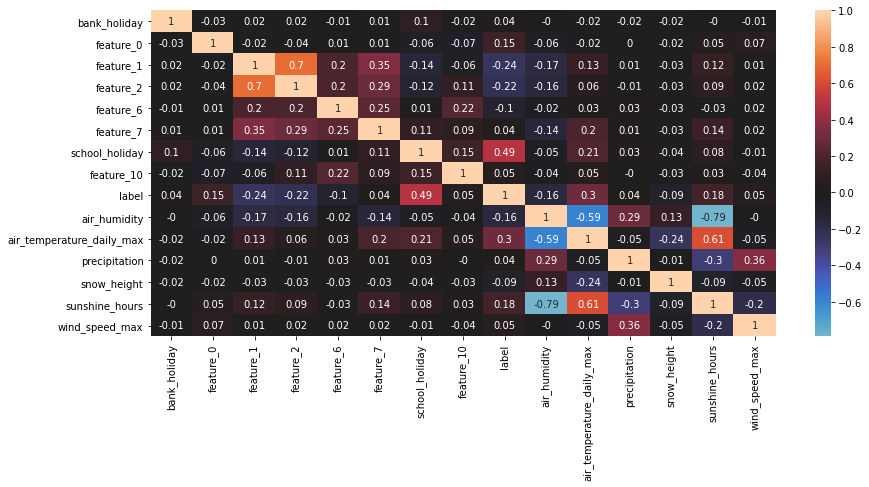

In [99]:
sns.heatmap(df.corr().round(2), annot=True, center = 0)

<AxesSubplot:ylabel='date'>

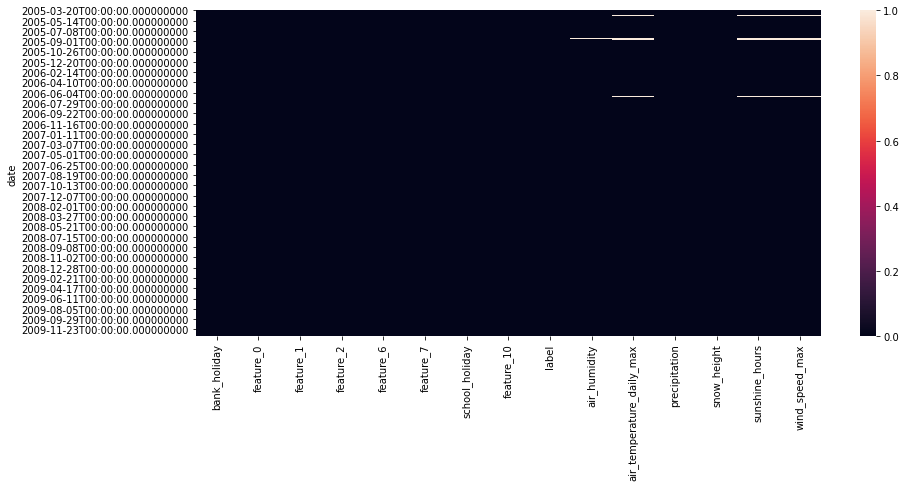

In [100]:
sns.heatmap(df.isna())

We can see some missing values in weather data

In [553]:
df.isna().any()

bank_holiday                  False
feature_0                     False
feature_1                     False
feature_2                     False
feature_3                     False
feature_4                     False
feature_5                     False
feature_6                     False
feature_7                     False
school_holiday                False
feature_8                     False
feature_9                     False
feature_10                    False
label                         False
air_humidity                   True
air_temperature_daily_max      True
air_temperature_daily_mean     True
air_temperature_daily_min      True
precipitation                 False
snow_height                   False
sunshine_hours                 True
wind_speed_max                 True
dtype: bool

We will replace Nan values with mean values for the beginning, but its better to replace with data from another year for this time period

In [578]:
df.loc[df['air_humidity'].isna()==True, 'air_humidity']=df['air_humidity'].mean()
df.loc[df['air_temperature_daily_max'].isna()==True, 'air_temperature_daily_max']=df['air_temperature_daily_max'].mean()
df.loc[df['sunshine_hours'].isna()==True, 'sunshine_hours']=df['sunshine_hours'].mean()
df.loc[df['wind_speed_max'].isna()==True, 'wind_speed_max']=df['wind_speed_max'].mean()

Scale our data

In [579]:
scaler = RobustScaler()

In [580]:
columns_to_scale = ['feature_6','air_humidity', 'air_temperature_daily_max', 'precipitation', 'snow_height',
                   'sunshine_hours', 'wind_speed_max']
for col in columns_to_scale:
    df[col] = scaler.fit_transform(np.array(df[col]).reshape(-1, 1))

In [561]:
df

,bank_holiday,feature_0,feature_1,feature_2,feature_6,feature_7,school_holiday,feature_10,label,air_humidity,air_temperature_daily_max,precipitation,snow_height,sunshine_hours,wind_speed_max
date,,,,,,,,,,,,,,,
2005-03-20,0,0,0,0,-1.0,0,0,0,915,-0.705882,-0.520325,-0.070175,0.0,1.125926,-0.494624
2005-03-21,0,0,0,0,-1.0,0,3,0,1057,-1.352941,-0.170732,-0.070175,0.0,1.155556,-0.043011
2005-03-22,0,0,0,0,-1.0,0,3,0,1482,-1.705882,0.219512,1.087719,0.0,0.755556,-0.150538
2005-03-23,0,0,0,0,-1.0,0,3,0,1883,-0.117647,0.186992,-0.070175,0.0,0.725926,-0.365591
2005-03-24,0,0,0,0,-1.0,0,3,0,1790,-0.588235,0.390244,1.438596,0.0,0.651852,-0.279570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-27,0,0,0,0,0.5,0,3,0,1524,0.058824,-0.853659,1.157895,0.0,-0.518519,0.408602
2009-12-28,0,0,0,0,0.5,0,3,0,1542,0.588235,-0.821138,0.000000,0.0,-0.207407,0.774194
2009-12-29,0,0,0,0,0.5,0,3,0,1922,0.823529,-1.178862,1.543860,0.0,-0.340741,-0.301075


Linear Regression model as second base line model
Select columns for y and X: X -> y

In [562]:
X=df.drop(['label'], axis=1)
y=df['label']

Split to train and test data

In [563]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [564]:
lg=LinearRegression()
lg.fit(X_train, y_train)
y_pred_test = lg.predict(X_test)
y_pred_train = lg.predict(X_train)

Scores to estimate regression model: mean_squared_error, r2_score,mape

In [565]:
print('Test')
print_scores(y_test, y_pred_test)
print('Train')
print_scores(y_train, y_pred_train)

Test
RMSE:  496.4882224250333
R2:  0.3714569129687184
MAPE:  0.41429408914746874
Train
RMSE:  487.0780027692049
R2:  0.3689071224158874
MAPE:  0.4021993852625568


Check features importance

feature: bank_holiday, importance: (0, 19.27234759062547)
feature: feature_0, importance: (1, 413.4168001001457)
feature: feature_1, importance: (2, -466.685579003917)
feature: feature_2, importance: (3, -164.22058429369338)
feature: feature_6, importance: (4, -85.13933492832399)
feature: feature_7, importance: (5, 158.99799981139992)
feature: school_holiday, importance: (6, 231.47678885781485)
feature: feature_10, importance: (7, -98.03148605680595)
feature: air_humidity, importance: (8, -46.80674311850245)
feature: air_temperature_daily_max, importance: (9, 165.9411717678515)
feature: precipitation, importance: (10, 19.60060611432769)
feature: snow_height, importance: (11, -12.654554510077205)
feature: sunshine_hours, importance: (12, 10.641068729955618)
feature: wind_speed_max, importance: (13, 27.549774512434254)


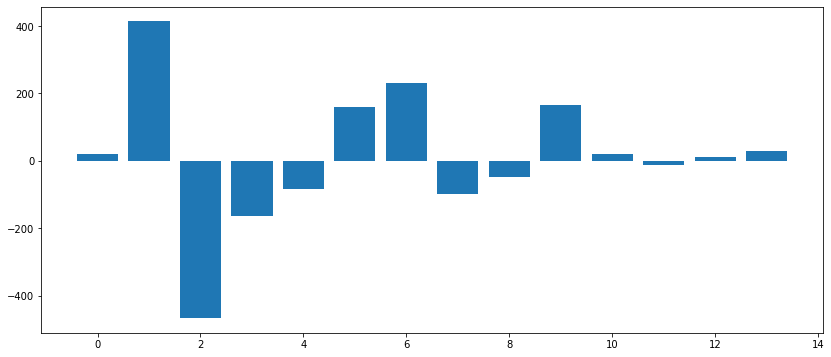

In [566]:
importance = lg.coef_
# summarize feature importance
for i,v in zip(X_train.columns, enumerate(importance)):
    print(f'feature: {i}, importance: {v}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Feature Engineering

In [582]:
df['year']=df.index.year
df['month']=df.index.month
df['week_day']=df.index.dayofweek
df['step'] = list(range(len(df)))

In [332]:
df['date'] = df.index

In [199]:
df.tail()

,bank_holiday,feature_0,feature_1,feature_2,feature_6,feature_7,school_holiday,feature_10,label,air_humidity,...,precipitation,snow_height,sunshine_hours,wind_speed_max,year,month,week_day,day,step,date
date,,,,,,,,,,,,,,,,,,,,,
2009-12-27,0,0,0,0,4.6,0,3,0,1524,82.0,...,3.5,0,0.0,11.8,2009,12,6,27,1738,2009-12-27
2009-12-28,0,0,0,0,4.6,0,3,0,1542,91.0,...,0.2,0,2.1,13.5,2009,12,0,28,1739,2009-12-28
2009-12-29,0,0,0,0,4.6,0,3,0,1922,95.0,...,4.6,0,1.2,8.5,2009,12,1,29,1740,2009-12-29
2009-12-30,0,0,0,0,4.6,0,3,0,1576,95.0,...,10.7,3,0.0,8.7,2009,12,2,30,1741,2009-12-30
2009-12-31,0,0,0,0,4.6,0,3,0,392,95.0,...,7.2,3,0.0,8.3,2009,12,3,31,1742,2009-12-31


<AxesSubplot:xlabel='label', ylabel='Count'>

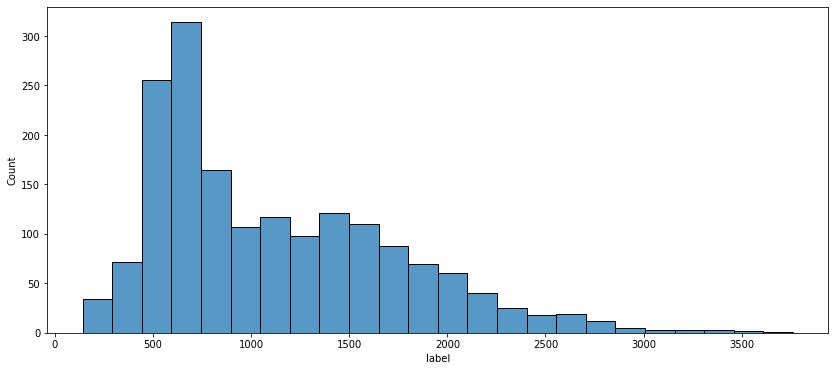

In [297]:
sns.histplot(df.label)

Plot dependences on season and holidays

<AxesSubplot:xlabel='step', ylabel='label'>

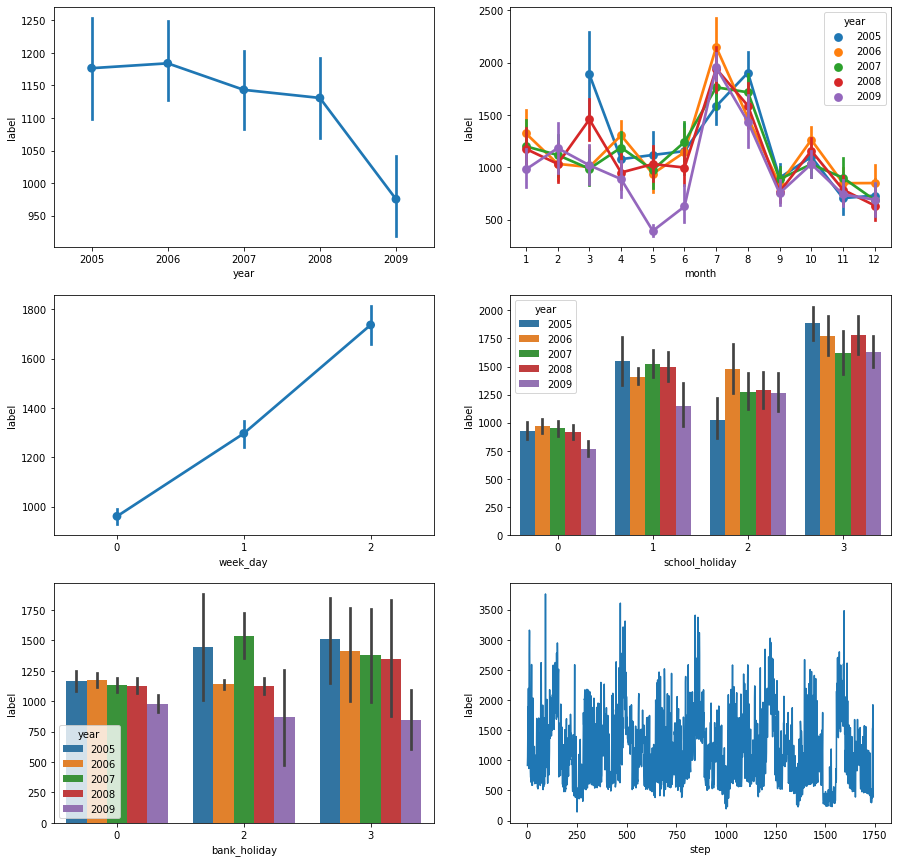

In [587]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(15, 15)
sns.pointplot(x = 'year', y='label', data = df, ax = axes[0, 0])
sns.pointplot(x='month', y='label', hue = 'year', data=df, ax=axes[0, 1])
sns.pointplot(x='week_day', y='label', data=df, ax=axes[1, 0])
sns.barplot(x='school_holiday', y='label', hue = 'year', data=df, ax=axes[1, 1])
sns.barplot(x='bank_holiday', y='label', hue = 'year', data=df, ax=axes[2, 0])
sns.lineplot(x='step', y='label', data=df, ax=axes[2, 1])

Plot dependences on weather

<AxesSubplot:xlabel='wind_speed_max', ylabel='label'>

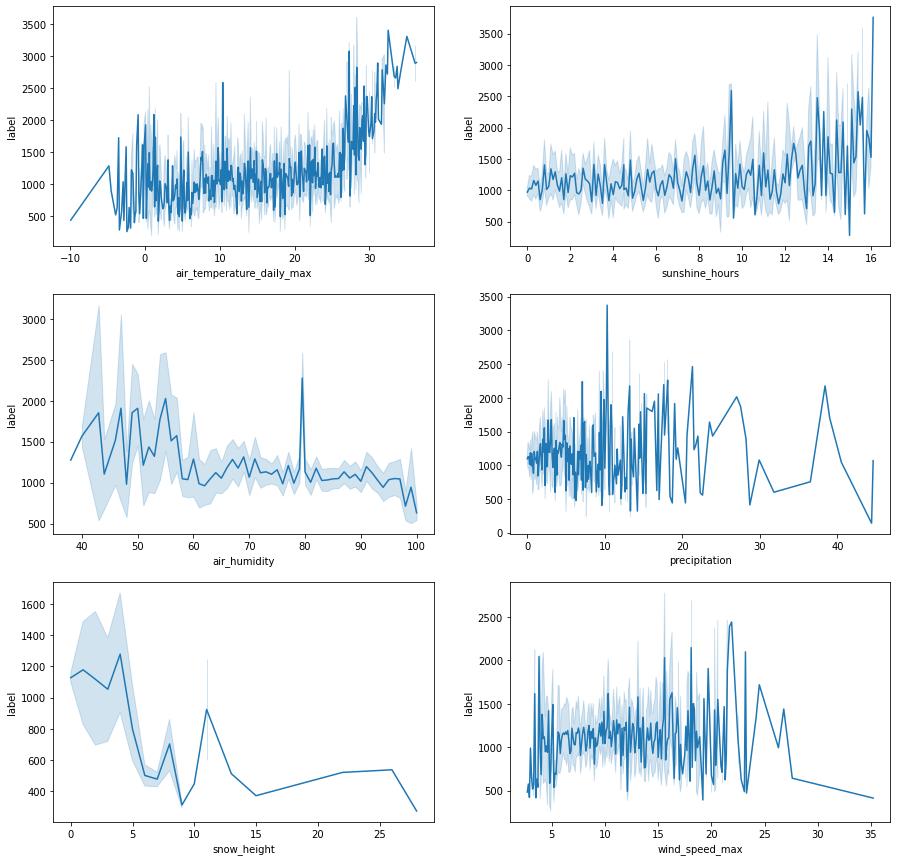

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(15, 15)
sns.lineplot(x='air_temperature_daily_max', y='label', data=df, ax=axes[0, 0])
sns.lineplot(x='sunshine_hours', y='label', data=df, ax=axes[0, 1])
sns.lineplot(x='air_humidity', y='label', data=df, ax=axes[1, 0])
sns.lineplot(x='precipitation', y='label', data=df, ax=axes[1, 1])
sns.lineplot(x='snow_height', y='label', data=df, ax=axes[2, 0])
sns.lineplot(x='wind_speed_max', y='label', data=df, ax=axes[2, 1])

<AxesSubplot:xlabel='feature_10', ylabel='label'>

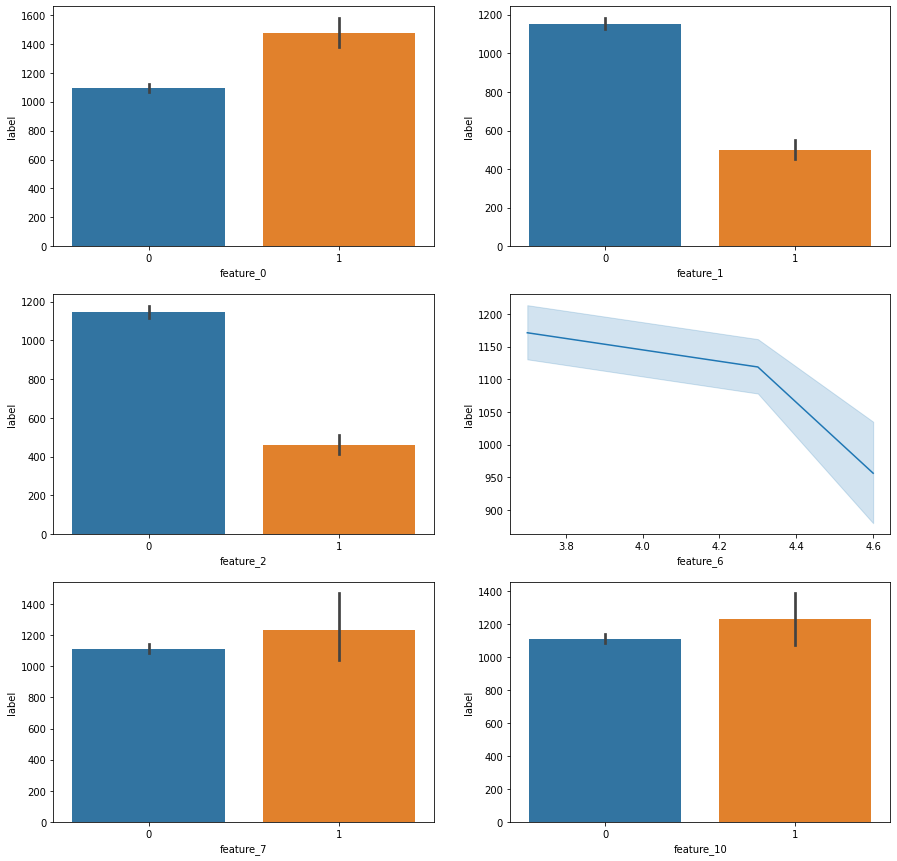

In [36]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(15, 15)
sns.barplot(x='feature_0', y='label', data=df, ax=axes[0, 0])
sns.barplot(x='feature_1', y='label', data=df, ax=axes[0, 1])
sns.barplot(x='feature_2', y='label', data=df, ax=axes[1, 0])
sns.lineplot(x='feature_6', y='label', data=df, ax=axes[1, 1])
sns.barplot(x='feature_7', y='label', data=df, ax=axes[2, 0])
sns.barplot(x='feature_10', y='label', data=df, ax=axes[2, 1])

For week days we get 0 for working days, 1 for Sat and 2 for Sun

In [584]:
def weekday(x):
    res = 0
    if x == 5:
        res = 1
    elif x==6:
        res = 2
    return res    

In [585]:
df.week_day = df.week_day.apply(lambda x: weekday(x))

In 2009 something happened in May and June and number of visits were very low, why? Maybe closure due to renovation or something else happened. I would add +1000 clients in period between 04.2009 and 07.2009

<AxesSubplot:xlabel='date'>

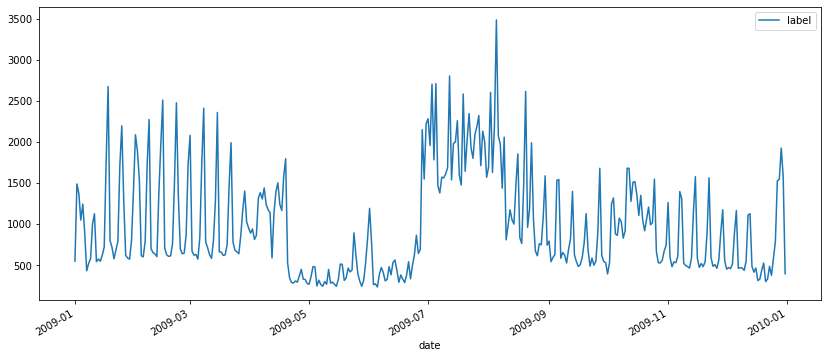

In [610]:
df.loc[df['year']==2009, ['label']].plot()

<AxesSubplot:xlabel='date'>

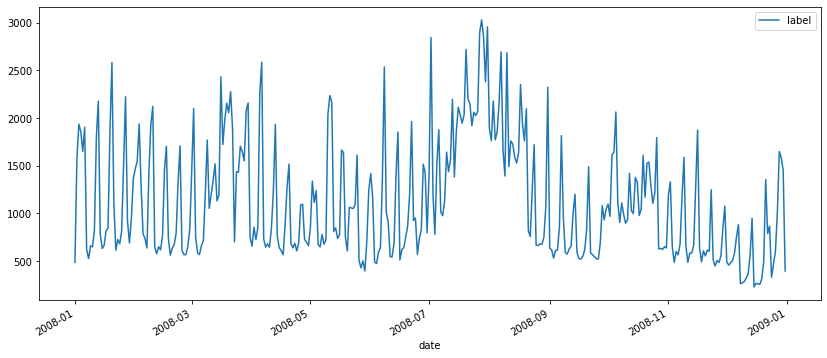

In [588]:
df.loc[df['year']==2008, ['label']].plot()

In [599]:
# df.loc[(df['year']==2009 and df['month']>4 and df['month']<7), 'label'] = \
#         df.loc[(df['year']==2009 and df['month']>4 and df['month']<7), 'label'].apply(lambda x: x+1000)

In [611]:
X.columns

Index(['bank_holiday', 'feature_0', 'feature_1', 'feature_2', 'feature_6',
       'feature_7', 'school_holiday', 'feature_10', 'air_humidity',
       'air_temperature_daily_max', 'precipitation', 'snow_height',
       'sunshine_hours', 'wind_speed_max', 'month', 'week_day', 'step'],
      dtype='object')

In [624]:
X = df.drop(['label','day', 'year'], axis = 1)
y = df['label']

In [625]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [626]:
lg=LinearRegression()
lg.fit(X_train, y_train)
y_pred_test = lg.predict(X_test)
y_pred_train = lg.predict(X_train)

In [627]:
print('Test')
print_scores(y_test, y_pred_test)
print('Train')
print_scores(y_train, y_pred_train)

Test
RMSE:  401.94637425434314
R2:  0.5880415800946721
MAPE:  0.2936084127340289
Train
RMSE:  387.2408417557978
R2:  0.6011050330362238
MAPE:  0.2901528582155762


Check the trend

In [628]:
lg=LinearRegression()
lg.fit(df[['step']],df['label'])
df['trend']=lg.predict(df[['step']])

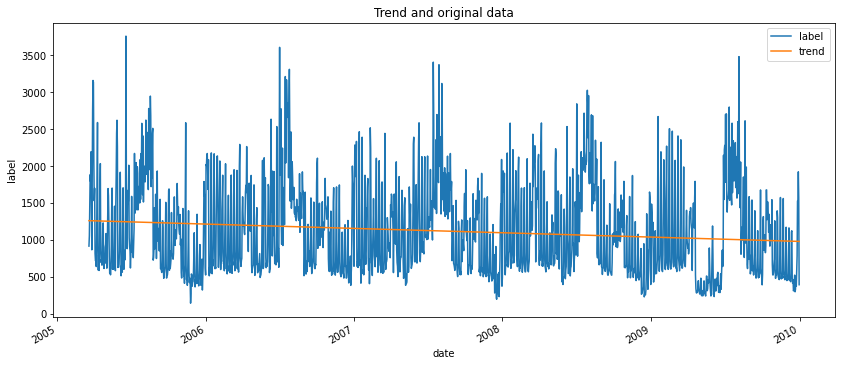

In [629]:
plot(df[['label', 'trend']], 'Trend and original data')

We can see that line goes down, so we should keep step feature

Lets check seasonality

In [630]:
df = df.join(pd.get_dummies(df['month'], prefix='m', drop_first=True))

In [631]:
df.columns

Index(['bank_holiday', 'feature_0', 'feature_1', 'feature_2', 'feature_6',
       'feature_7', 'school_holiday', 'feature_10', 'label', 'air_humidity',
       'air_temperature_daily_max', 'precipitation', 'snow_height',
       'sunshine_hours', 'wind_speed_max', 'year', 'month', 'week_day', 'day',
       'step', 'trend', 'm_2', 'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9',
       'm_10', 'm_11', 'm_12'],
      dtype='object')

In [632]:
X = df[['m_2', 'm_3', 'm_4', 'm_5', 'm_6', 'm_7',
       'm_8', 'm_9', 'm_10', 'm_11', 'm_12']]
y=df['label']

In [633]:
lg=LinearRegression()
lg.fit(X, y)

LinearRegression()

In [634]:
y_pred = lg.predict(X)
df['seasonal']=y_pred

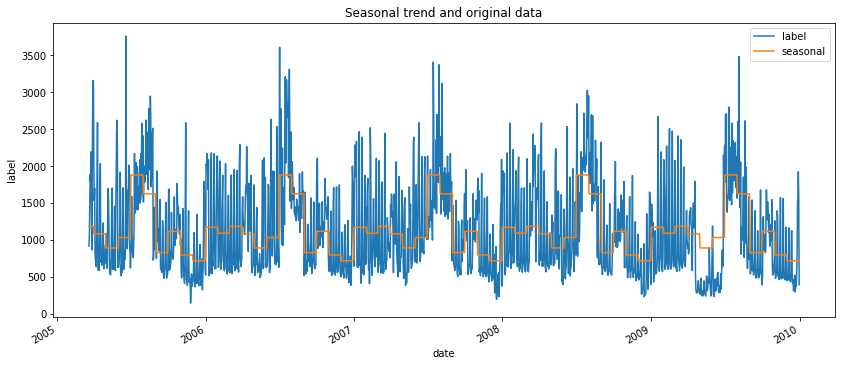

In [635]:
plot(df[['label', 'seasonal']], 'Seasonal trend and original data')

Do the same on weekday

In [636]:
df = df.join(pd.get_dummies(df['week_day'], prefix='d', drop_first=True))

In [637]:
df.columns

Index(['bank_holiday', 'feature_0', 'feature_1', 'feature_2', 'feature_6',
       'feature_7', 'school_holiday', 'feature_10', 'label', 'air_humidity',
       'air_temperature_daily_max', 'precipitation', 'snow_height',
       'sunshine_hours', 'wind_speed_max', 'year', 'month', 'week_day', 'day',
       'step', 'trend', 'm_2', 'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9',
       'm_10', 'm_11', 'm_12', 'seasonal', 'd_1', 'd_2'],
      dtype='object')

In [638]:
X = df[['d_1', 'd_2']]
y=df['label']

In [639]:
lg=LinearRegression()
lg.fit(X, y)

LinearRegression()

In [640]:
y_pred = lg.predict(X)
df['week']=y_pred

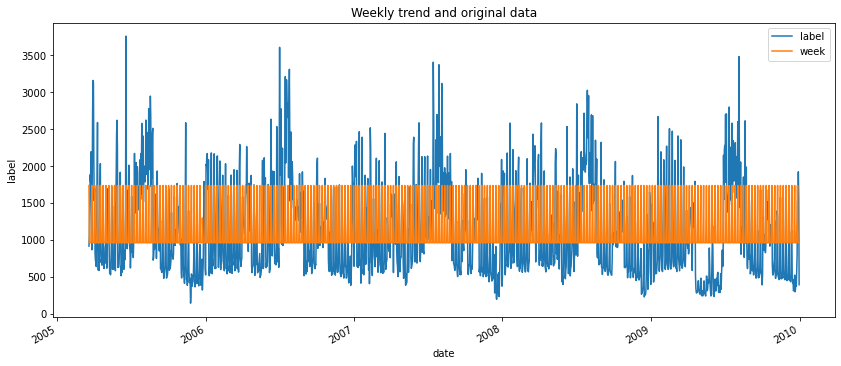

In [641]:
plot(df[['label', 'week']], 'Weekly trend and original data')

## Check different models

In [646]:
df = df.drop(['day', 'year', 'seasonal', 'week'], axis = 1)

In [647]:
X = df.drop(['label'], axis = 1)
y = df['label']

In [651]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [652]:
from sklearn.linear_model import Lasso

In [653]:
la=Lasso(alpha = 0.5)
la.fit(X_train, y_train)
y_pred_test = la.predict(X_test)
y_pred_train = la.predict(X_train)

In [654]:
print('Test')
print_scores(y_test, y_pred_test)
print('Train')
print_scores(y_train, y_pred_train)

Test
RMSE:  381.23585400053986
R2:  0.6294006711178222
MAPE:  0.28310957735790154
Train
RMSE:  366.2280535055215
R2:  0.6432208527774779
MAPE:  0.26973101498957214


In [655]:
from sklearn.linear_model import ElasticNet

In [656]:
en=ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
y_pred_test = en.predict(X_test)
y_pred_train = en.predict(X_train)

In [657]:
print('Test')
print_scores(y_test, y_pred_test)
print('Train')
print_scores(y_train, y_pred_train)

Test
RMSE:  381.4294528346631
R2:  0.6290241807397827
MAPE:  0.28455686189865725
Train
RMSE:  366.3337950186819
R2:  0.6430147963985506
MAPE:  0.27041779646822495


In [658]:
from sklearn.linear_model import BayesianRidge

In [659]:
br = BayesianRidge()

In [660]:
br.fit(X_train, y_train)
y_pred_test = br.predict(X_test)
y_pred_train = br.predict(X_train)

In [661]:
print('Test')
print_scores(y_test, y_pred_test)
print('Train')
print_scores(y_train, y_pred_train)

Test
RMSE:  381.4060868869207
R2:  0.6290696304869894
MAPE:  0.2845407145682129
Train
RMSE:  366.3214308038515
R2:  0.6430388933687036
MAPE:  0.27041037758857467


In [662]:
from sklearn.linear_model import SGDRegressor

In [663]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)
y_pred_test = sgd.predict(X_test)
y_pred_train = sgd.predict(X_train)

In [664]:
print('Test')
print_scores(y_test, y_pred_test)
print('Train')
print_scores(y_train, y_pred_train)

Test
RMSE:  832080998399586.1
R2:  -1.7654212984083376e+24
MAPE:  941832990706.5754
Train
RMSE:  809421603704702.4
R2:  -1.7427930886482373e+24
MAPE:  919472732073.1813


In [665]:
from sklearn.tree import DecisionTreeRegressor

In [666]:
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train, y_train)
y_pred_test = dt.predict(X_test)
y_pred_train = dt.predict(X_train)

In [667]:
print('Test')
print_scores(y_test, y_pred_test)
print('Train')
print_scores(y_train, y_pred_train)

Test
RMSE:  358.9795201796921
R2:  0.6714083688681579
MAPE:  0.2824908067173782
Train
RMSE:  344.53933293271604
R2:  0.684227821899764
MAPE:  0.27278837426077324


## Random forest Regressor

In [685]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [686]:
print('Test')
print_scores(y_test, y_pred_test)
print('Train')
print_scores(y_train, y_pred_train)

Test
RMSE:  264.54301612585294
R2:  0.8215527932675216
MAPE:  0.18723633082958085
Train
RMSE:  107.39480509521123
R2:  0.9693194744989237
MAPE:  0.07448235335001299


In [688]:
# max_features = 5, max_depth = 14, n_estimators = 250
param_grid = [
{'n_estimators': [200,250,300], 'max_features': [10,11,12,13,14,15,16,17], 
 'max_depth': [10, 11,12,13,14,15,16,17]}
]

gs_rf = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error')
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14, 15, 16, 17],
                          'max_features': [10, 11, 12, 13, 14, 15, 16, 17],
                          'n_estimators': [200, 250, 300]}],
             scoring='neg_mean_squared_error')

In [689]:
gs_rf.best_estimator_

RandomForestRegressor(max_depth=17, max_features=12, n_estimators=250)

RandomForestRegressor(bootstrap=False, max_features=10, n_estimators=200)

In [691]:
y_pred_test = gs_rf.predict(X_test)
y_pred_train = gs_rf.predict(X_train)

In [692]:
print('Test')
print_scores(y_test, y_pred_test)
print('Train')
print_scores(y_train, y_pred_train)

Test
RMSE:  258.46958211964807
R2:  0.8296523941641875
MAPE:  0.18804037332420045
Train
RMSE:  108.46995797698887
R2:  0.968702100656937
MAPE:  0.08105023604147994


In [693]:
# extract the numerical values of feature importance from the grid search
importances = gs_rf.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df_fi = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df_fi['importance'])
feature= list(df_fi['feature'])

print(df_fi)

    importance                    feature
0     0.230834             school_holiday
1     0.147252                   week_day
2     0.108123  air_temperature_daily_max
3     0.081960                        d_2
4     0.068718                      month
5     0.044384                      trend
6     0.044013                       step
7     0.039469                        m_7
8     0.033844             sunshine_hours
9     0.028718               air_humidity
10    0.028599             wind_speed_max
11    0.023265               bank_holiday
12    0.019251                        d_1
13    0.018111              precipitation
14    0.017457                        m_8
15    0.010578                  feature_1
16    0.009637                  feature_2
17    0.007788                       m_12
18    0.007379                  feature_0
19    0.004458                  feature_6
20    0.004271                snow_height
21    0.003979                 feature_10
22    0.003831                    

In [694]:
df.to_csv('data/prepared_scaled.csv',index = True)